# Having a form in a notebook

* [Form](#Form)
* [Animated output](#Animated-output)
* [A form with IPython 3+](#A-form-with-IPython-3+)
* [Automated menu](#Automated-menu)  (this one is fix)

### Form

This following trick is inspired from [IPython Notebook: Javascript/Python Bi-directional Communication](https://jakevdp.github.io/blog/2013/06/01/ipython-notebook-javascript-python-communication/). The code is copy pasted below with some modifications.

In [ ]:
from IPython.display import HTML, Javascript, display_html, display_javascript

input_form = """
<div style="background-color:gainsboro; width:500px; padding:10px;">
<label>Variable Name: </label> 
<input type="text" id="var_name" value="myvar" size="170" />
<label>Variable Value: </label>
<input type="text" id="var_value" value="myvalue" />
<br />
<button onclick="set_value()">Set Value</button>
</div>
"""

javascript = """
function set_value(){
    var var_name = document.getElementById('var_name').value;
    var var_value = document.getElementById('var_value').value;
    var command = var_name + " = '" + var_value + "'";
    console.log("Executing Command: " + command);

    var kernel = IPython.notebook.kernel;
    kernel.execute(command);
}
"""

display_javascript(Javascript(javascript))
HTML(input_form)

In [ ]:
myvar

NameError: name 'myvar' is not defined

Now we try to get something like this:

In [ ]:
from pyquickhelper.ipythonhelper import open_html_form
params= {"module":"", "version":"v..."}
open_html_form(params, "fill the fields", "form1")

In [ ]:
form1

{'module': 'fl', 'version': 'v...'}

With a password:

In [ ]:
from pyquickhelper.ipythonhelper import open_html_form
params= {"login":"", "password":""}
open_html_form(params, "credential", "credential")

In [ ]:
credential

{'login': 'log', 'password': 'rrw'}

To excecute an instruction when the button *Ok* is clicked:

In [ ]:
my_address = None
def custom_action(x):
    x["combined"] = x["first_name"] + " " + x["last_name"]
    return str(x)
from pyquickhelper.ipythonhelper import open_html_form
params = { "first_name":"", "last_name":"" }
open_html_form (params, title="enter your name", key_save="my_address", hook="custom_action(my_address)")

In [ ]:
my_address

{'combined': 'xavier dupré', 'first_name': 'xavier', 'last_name': 'dupré'}

### Animated output

In [ ]:
from pyquickhelper.ipythonhelper import StaticInteract, RangeWidget, RadioWidget

In [ ]:
def show_fib(N):
    sequence = ""
    a, b = 0, 1
    for i in range(N):
        sequence += "{0} ".format(a)
        a, b = b, a + b
    return sequence

StaticInteract(show_fib,
               N=RangeWidget(1, 100, default=10))

In order to have a fast display, the function ``show_lib`` is called for each possible version. If it is a graph, all possible graphs will be generated.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig


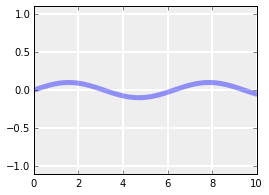
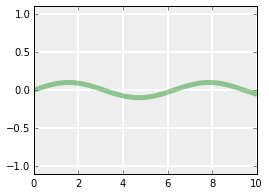
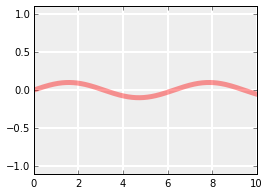
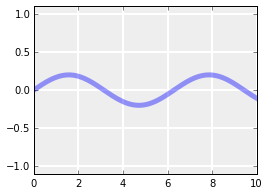
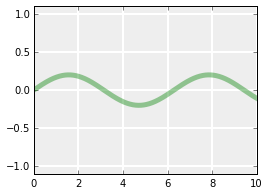
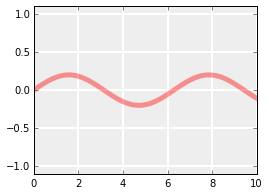
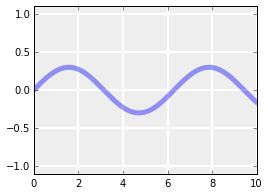
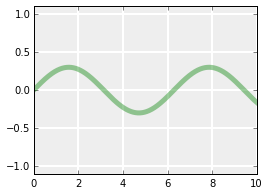
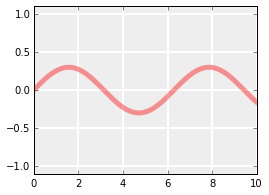
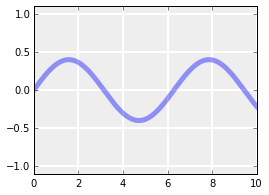
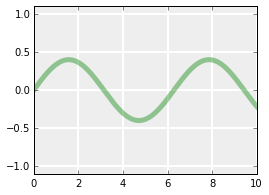
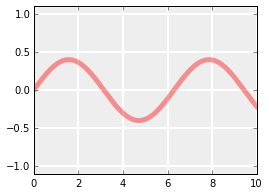
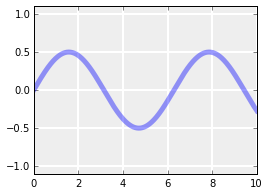
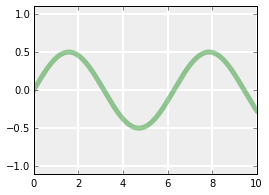
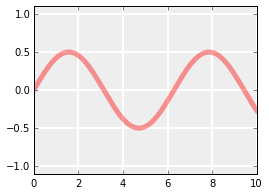

In [ ]:
StaticInteract(plot,
               amplitude=RangeWidget(0.1, 0.5, 0.1, default=0.4),
               color=RadioWidget(['blue', 'green', 'red'], default='red'))

### A form with IPython 3+

Not yet ready and the form does not show up in the converted notebook. You need to execute the notebook.

In [ ]:
from IPython.display import display
from ipywidgets import Text
last_name = Text(description="Last Name")
first_name = Text(description="First Name")
display(last_name)
display(first_name)

In [ ]:
first_name.value, last_name.value

('v2', 'v1')

### Automated menu

In [ ]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()